<a href="https://colab.research.google.com/github/sayanbanerjee32/TSAI_ERAv2_S5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Import all required packages including local files

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

#import from local modules
from model import Net, NetGAP, NetAntmanGAP
from utils import train, test, get_device, plot_accuracy_losses

## Check if GPU available

In [12]:
# CUDA? - call get_device function defined in utils.py
device = get_device()

CUDA Available? True


# Train and Test transformations

In [13]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

## Download and transform data

In [14]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
# test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

## Create Data Loader using transformed data

In [15]:
batch_size = 512

# kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

# Visualise Data

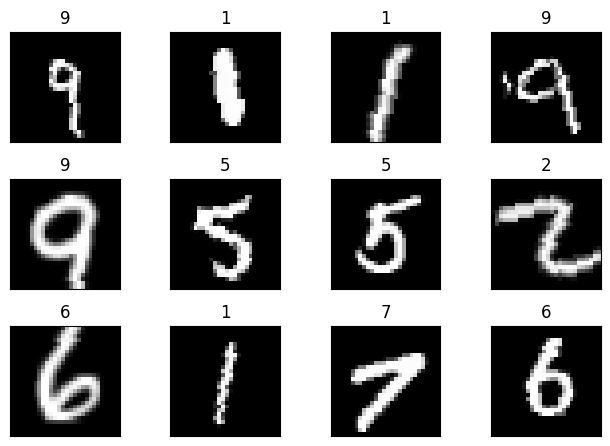

In [16]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

# Instantiate Convolution based DNN

In [17]:
## Use Net class defined in model.py
model = Net().to(device)
# visualise output dimensions and network parameters
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


# Training

In [18]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

## Perform Gradient Decent

In [19]:
# optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # reduce learning rate, loss not converging
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

# criterion = nn.CrossEntropyLoss()
criterion = F.cross_entropy
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  # call train function from utils.py
  trn_acc, trn_loss = train(model, device, train_loader, optimizer, criterion)
  # accumulate train accuracies and test losses for visualisation
  train_acc.append(trn_acc)
  train_losses.append(trn_loss)

  # call test function from utils.py
  tst_acc, tst_loss = test(model, device, test_loader, criterion)
  # accumulate test accuracies and test losses for visualisation
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3672 Batch_id=117 Accuracy=54.64: 100%|██████████| 118/118 [00:19<00:00,  5.96it/s]


Test set: Average loss: 0.2241, Accuracy: 9343/10000 (93.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1564 Batch_id=117 Accuracy=94.19: 100%|██████████| 118/118 [00:19<00:00,  6.00it/s]


Test set: Average loss: 0.1014, Accuracy: 9671/10000 (96.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0830 Batch_id=117 Accuracy=96.29: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]


Test set: Average loss: 0.0663, Accuracy: 9796/10000 (97.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0997 Batch_id=117 Accuracy=97.08: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]


Test set: Average loss: 0.0572, Accuracy: 9801/10000 (98.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0651 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:19<00:00,  6.11it/s]


Test set: Average loss: 0.0448, Accuracy: 9853/10000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1512 Batch_id=117 Accuracy=97.83: 100%|██████████| 118/118 [00:19<00:00,  5.98it/s]


Test set: Average loss: 0.0378, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1797 Batch_id=117 Accuracy=98.09: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0380, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0295 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]


Test set: Average loss: 0.0318, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0143 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]


Test set: Average loss: 0.0294, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0205 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:19<00:00,  6.07it/s]


Test set: Average loss: 0.0319, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0325 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:20<00:00,  5.86it/s]


Test set: Average loss: 0.0283, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0505 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]


Test set: Average loss: 0.0278, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0277 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:19<00:00,  6.07it/s]


Test set: Average loss: 0.0278, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0502 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:19<00:00,  5.96it/s]


Test set: Average loss: 0.0277, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0158 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:20<00:00,  5.78it/s]


Test set: Average loss: 0.0258, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0491 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:20<00:00,  5.82it/s]


Test set: Average loss: 0.0225, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0228 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:19<00:00,  6.01it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0304 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:20<00:00,  5.89it/s]


Test set: Average loss: 0.0218, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0285 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]


Test set: Average loss: 0.0220, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0363 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0215, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.


# Visualise training and test losses and accuracies

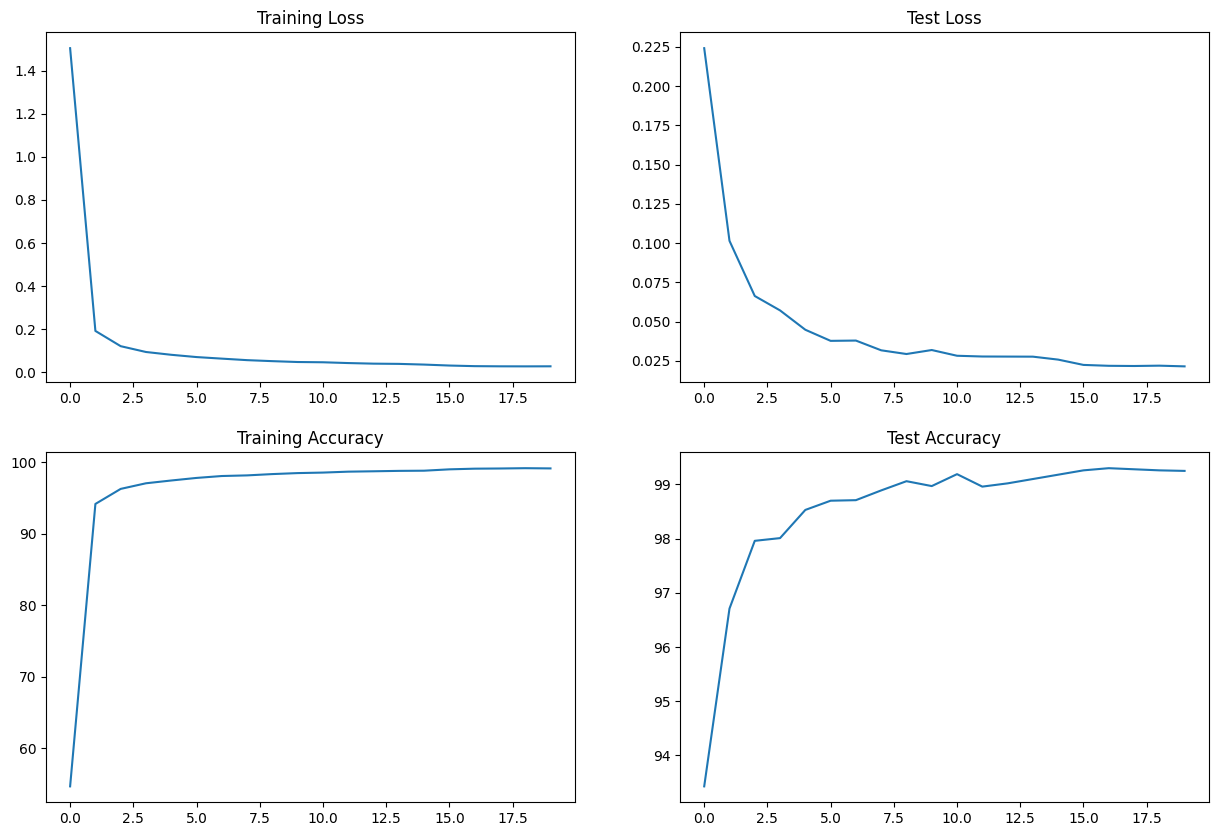

In [20]:
## use function from utils.py
plot_accuracy_losses(train_losses, train_acc, test_losses, test_acc)

In [21]:
## Not required
# !pip install torchsummary
# from torchsummary import summary
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# model = Net().to(device)
# summary(model, input_size=(1, 28, 28))